In [1]:
import numpy as np
import pandas as pd

In [48]:
import matplotlib.pyplot as plt

In [92]:
starbucks = pd.read_csv('starbucks.csv').dropna()
starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [7]:
# Determine the total number of entries in ‘starbucks’
# Print all the column names in the DataFrame.
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    object 
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    object 
 14 

In [9]:
# Find out how the DataFrame is indexed.
starbucks.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241],
      dtype='int64', length=241)

In [34]:
# Determine the drink that contains the most amount of sugar on average.
starbucks['Beverage'][starbucks.iloc[:, 12].max()]

'Caffè Mocha (Without Whipped Cream)'

In [40]:
# Find out how many different drink categories there are. 
starbucks['Beverage_category'].nunique()

9

In [43]:
# Identify the 5 most frequent drink categories.
starbucks['Beverage_category'].value_counts().head()

Beverage_category
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          17
Name: count, dtype: int64

In [45]:
# Find out the average calorie content per drink category.
starbucks.groupby('Beverage_category')['Calories'].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                115.882353
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [93]:
# Create a new column ‘caffeine_to_calories’ 
# that represents the ratio of caffeine to calories in each drink.
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['caffeine_to_calories'] = starbucks['Calories'] / starbucks['Caffeine (mg)'] 
starbucks['caffeine_to_calories']

0      0.017143
1      0.015385
2      0.015152
3      0.012195
4      0.933333
         ...   
237         inf
238         inf
239         inf
240         inf
241         inf
Name: caffeine_to_calories, Length: 241, dtype: float64

In [97]:
# Find the drink category that, on average, has the highest ‘caffeine_to_calories’ ratio.
starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean().idxmax()

'Frappuccino® Light Blended Coffee'

<BarContainer object of 9 artists>

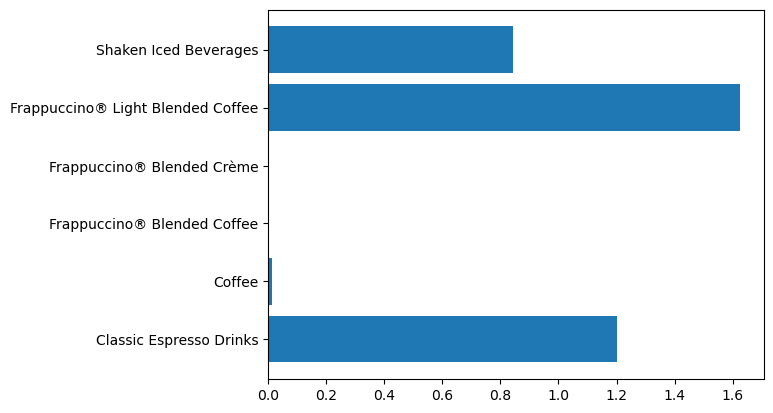

In [99]:
# Create a horizontal bar plot that shows the average ‘caffeine_to_calories’ ratio for each drink category. 
average = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
plt.barh(average.index, average)
